In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
from osgeo import gdal

dataset = gdal.Open("/data/gdrive/Data/Landsat/l8b30f30clip.tif", gdal.GA_ReadOnly)
array = np.array([dataset.GetRasterBand(1).ReadAsArray().flatten()])
for x in range(2, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(x)
    array = np.append(array,[band.ReadAsArray().flatten()],axis=0)
    
array = np.transpose(array)

In [3]:
print (dataset.RasterCount, dataset.RasterYSize, dataset.RasterXSize)
arys=[]
for i in range(1, dataset.RasterCount+1):
    arys.append(dataset.GetRasterBand(i).ReadAsArray())
arys = np.concatenate(arys)

8 484 320


In [4]:
array = np.hstack((array,np.column_stack((array[:,4]-array[:,3])/(array[:,4]+array[:,3])).T))

In [5]:
df_tif = pd.DataFrame(array)
df_tif.head()

,0,1,2,3,4,5,6,7,8
0,0.168692,0.159175,0.159263,0.178694,0.251161,0.240562,0.183507,0.000508,0.168584
1,0.172710,0.165755,0.166749,0.183088,0.256526,0.238288,0.175978,0.000883,0.167052
2,0.154273,0.142770,0.139171,0.151889,0.240275,0.241114,0.168957,0.000972,0.225381
3,0.153037,0.140208,0.129787,0.135594,0.201812,0.188851,0.129301,0.000751,0.196257
4,0.157254,0.145154,0.133054,0.136411,0.177104,0.173947,0.122125,0.001192,0.129798


In [6]:

x_scaled = StandardScaler().fit_transform(array.astype(np.float64))

In [7]:
sklearn_pca = PCA(n_components=6)
X_sklearn = sklearn_pca.fit_transform(x_scaled)

In [11]:
#distortions = []
inertia = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X_sklearn)
    kmeanModel.fit(X_sklearn)
    #distortions.append(sum(np.min(cdist(X_sklearn, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_sklearn.shape[0])
    #print(sum(np.min(cdist(X_sklearn, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_sklearn.shape[0])
    inertia.append(kmeanModel.inertia_)
    print(k,kmeanModel.inertia_)
    

1 1388073.7924125816
2 994956.002554773
3 817240.1550660591
4 705898.4553811065
5 596233.3281354154
6 505727.18497000117
7 424310.48300252756
8 375148.0872123239
9 330202.0072761987
10 300607.42435016535
11 281052.12818276475
12 263236.1961362405
13 245733.15524078906
14 230935.42851495798
15 218452.92463328762
16 207631.41507471065
17 198563.03334342307
18 189373.64702701452
19 180861.47055026283
20 174256.33938444583
21 167790.45279002385
22 161946.70436748187
23 156354.37267799178
24 151941.56767618938


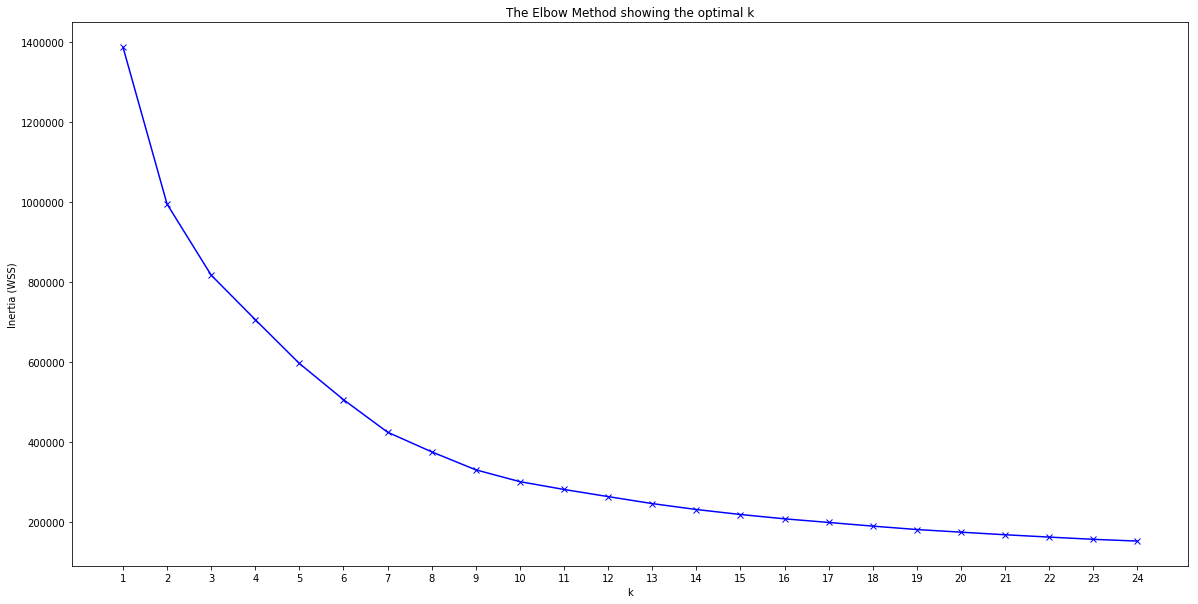

In [12]:
# Plot the elbow
plt.figure(figsize=(20,10))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.xticks(K)
plt.ylabel('Inertia (WSS)')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31880429856832776


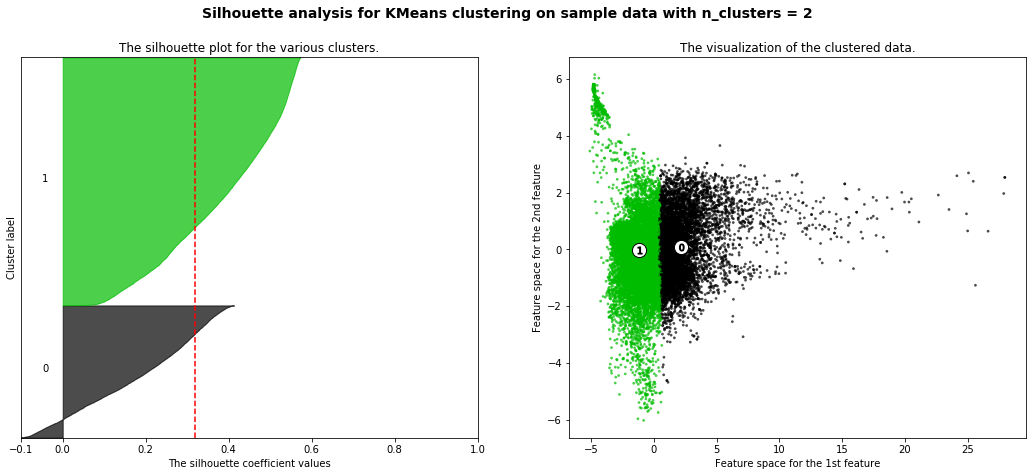

For n_clusters = 3 The average silhouette_score is : 0.2828481686152497


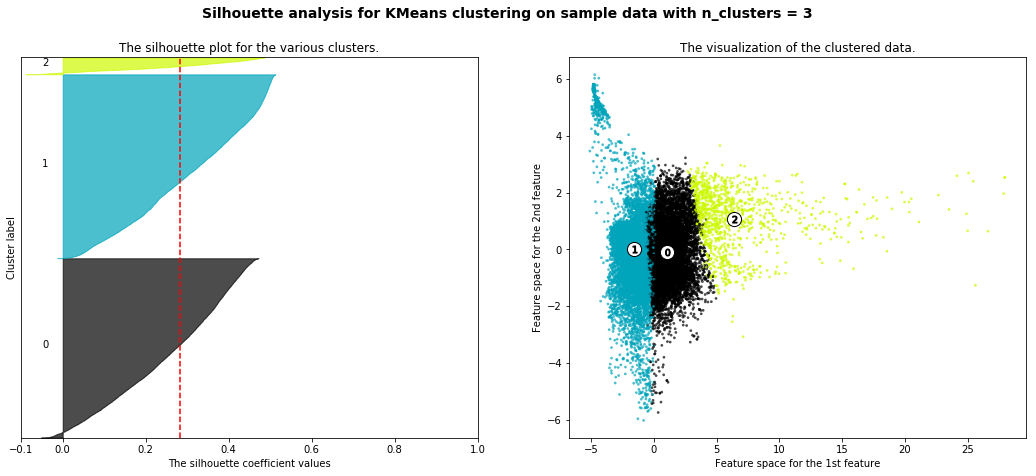

For n_clusters = 4 The average silhouette_score is : 0.2717170869556406


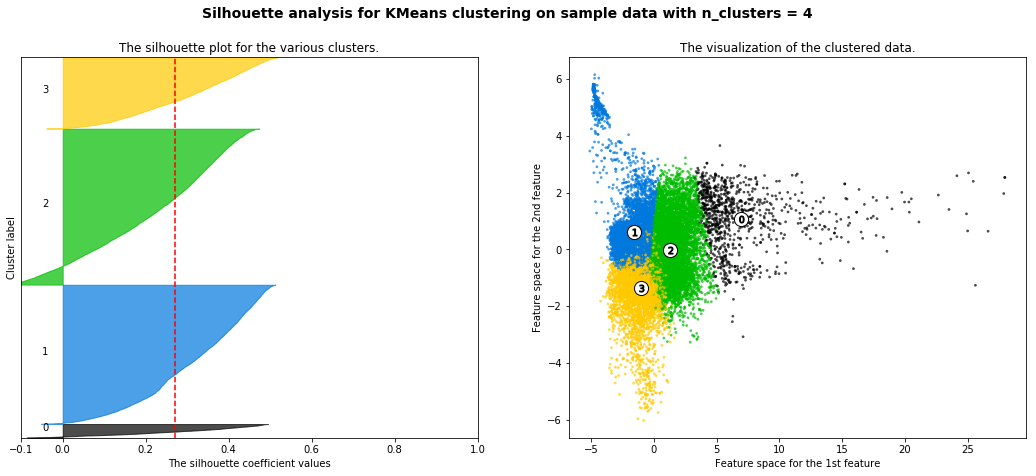

For n_clusters = 5 The average silhouette_score is : 0.28568033777417806


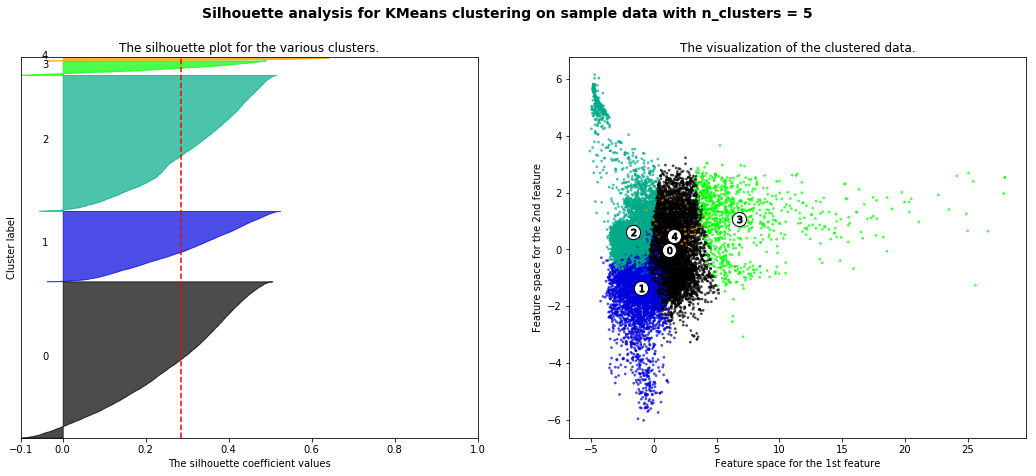

For n_clusters = 6 The average silhouette_score is : 0.3033625504257275


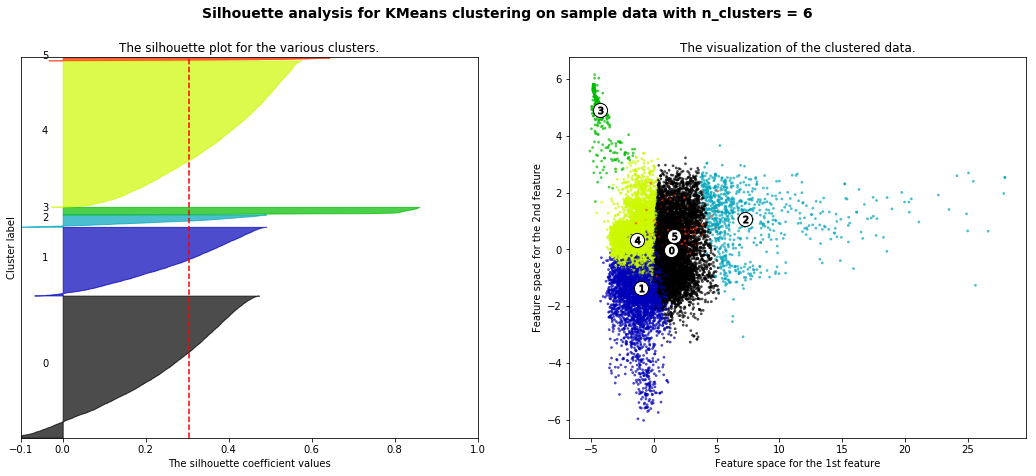

For n_clusters = 7 The average silhouette_score is : 0.322137732133757


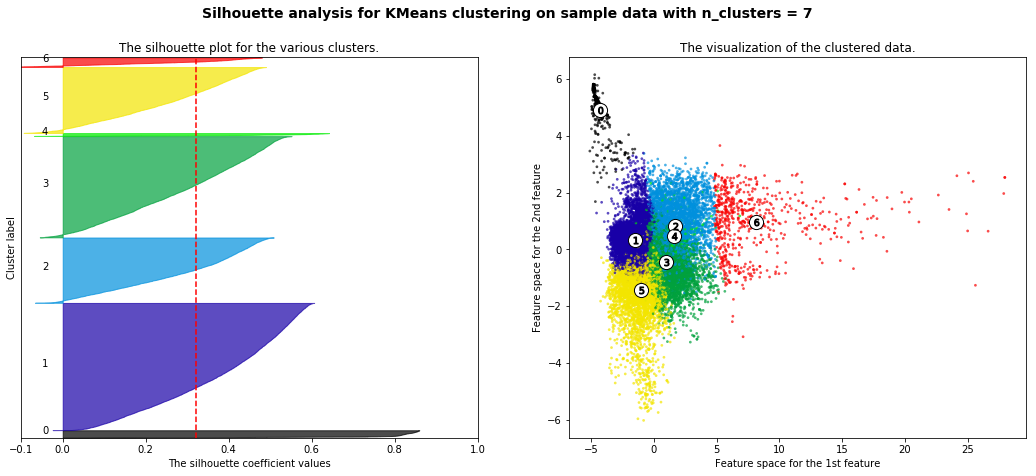

For n_clusters = 8 The average silhouette_score is : 0.3281119784523041


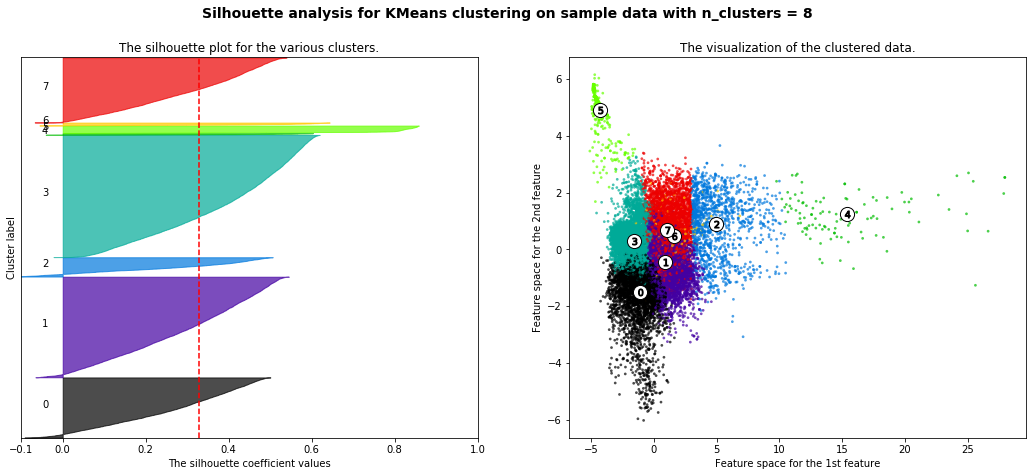

For n_clusters = 9 The average silhouette_score is : 0.30719080333338117


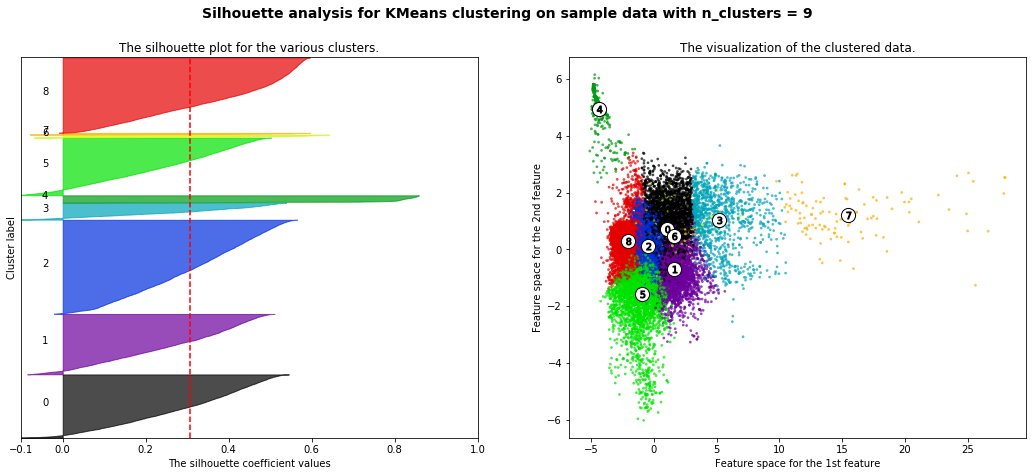

For n_clusters = 10 The average silhouette_score is : 0.3053365902629982


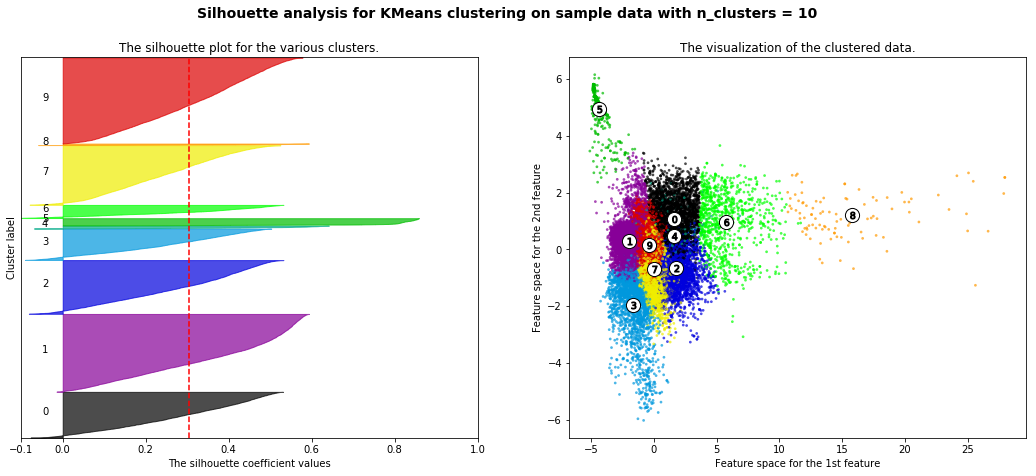

For n_clusters = 11 The average silhouette_score is : 0.3027592250743472


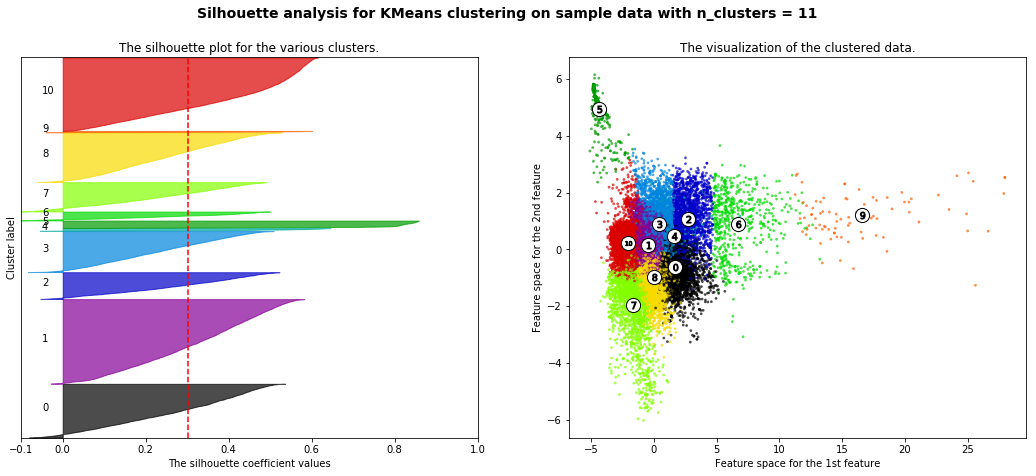

For n_clusters = 12 The average silhouette_score is : 0.2759985820417737


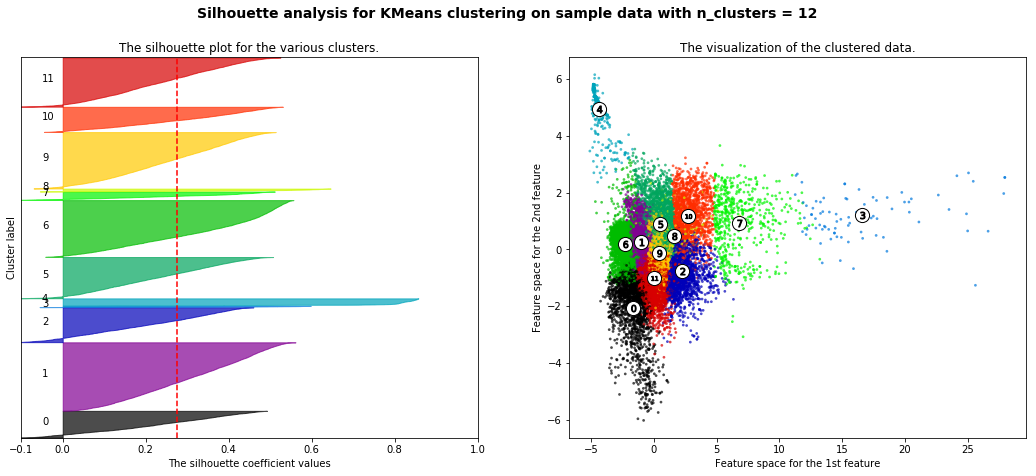

For n_clusters = 13 The average silhouette_score is : 0.2771245630982083


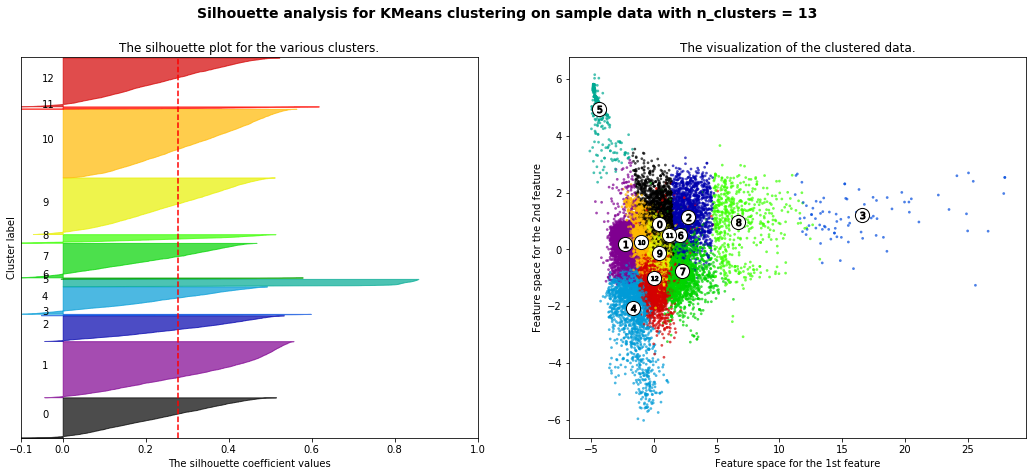

For n_clusters = 14 The average silhouette_score is : 0.27960012837778714


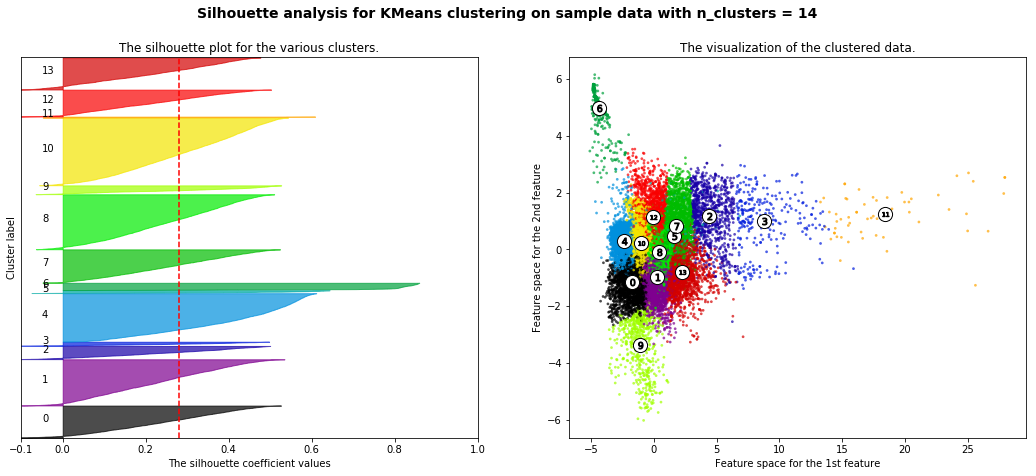

For n_clusters = 15 The average silhouette_score is : 0.27865892666680653


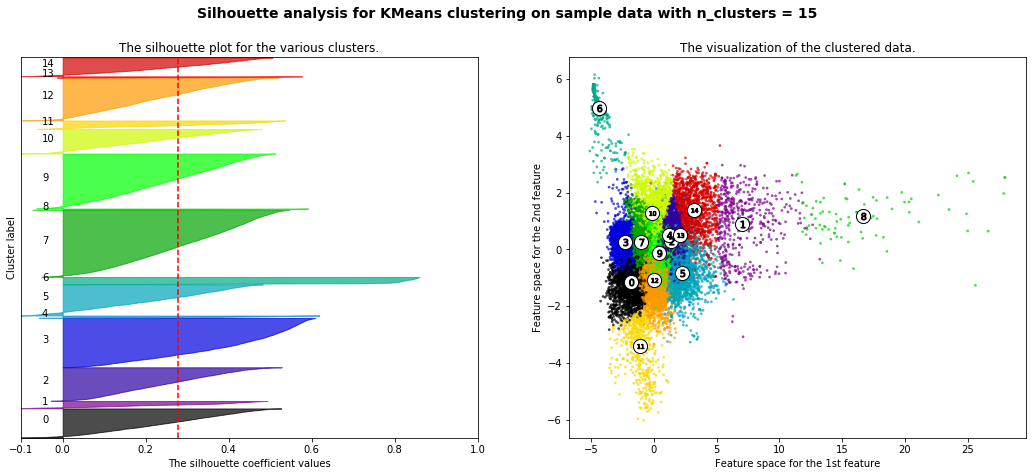

For n_clusters = 16 The average silhouette_score is : 0.2774011831903287


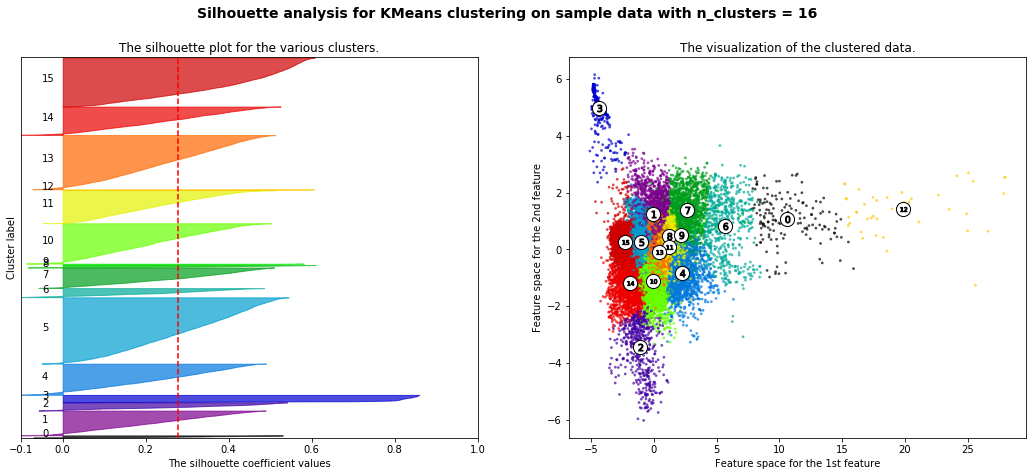

For n_clusters = 17 The average silhouette_score is : 0.2625557001226716


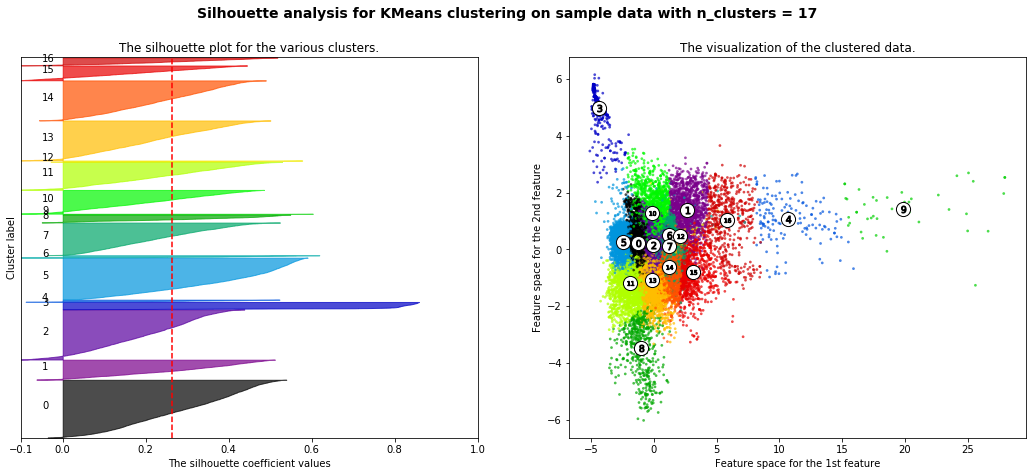

For n_clusters = 18 The average silhouette_score is : 0.29090311118218193


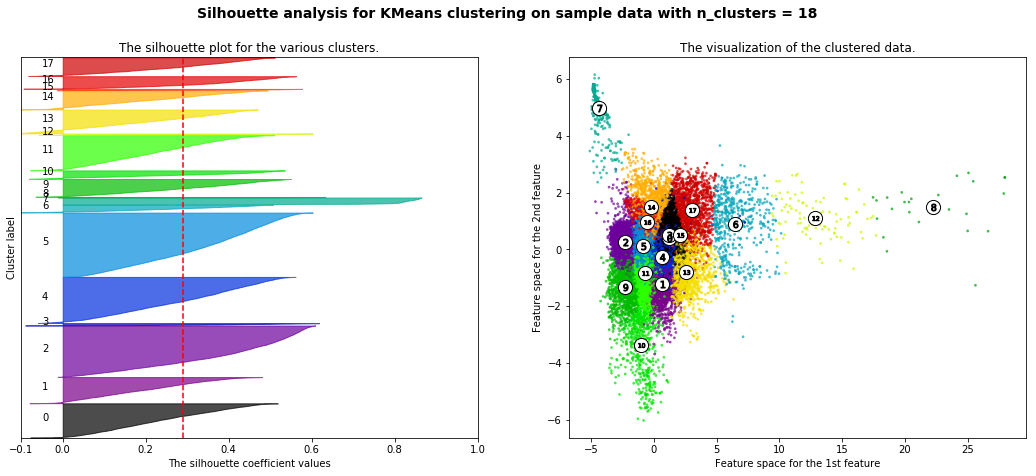

For n_clusters = 19 The average silhouette_score is : 0.28240287434717243


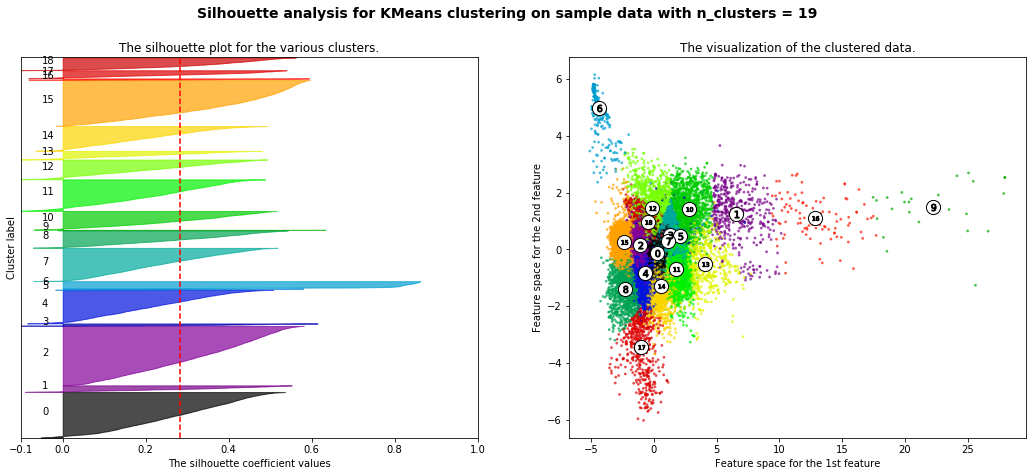

For n_clusters = 20 The average silhouette_score is : 0.2663690351535566


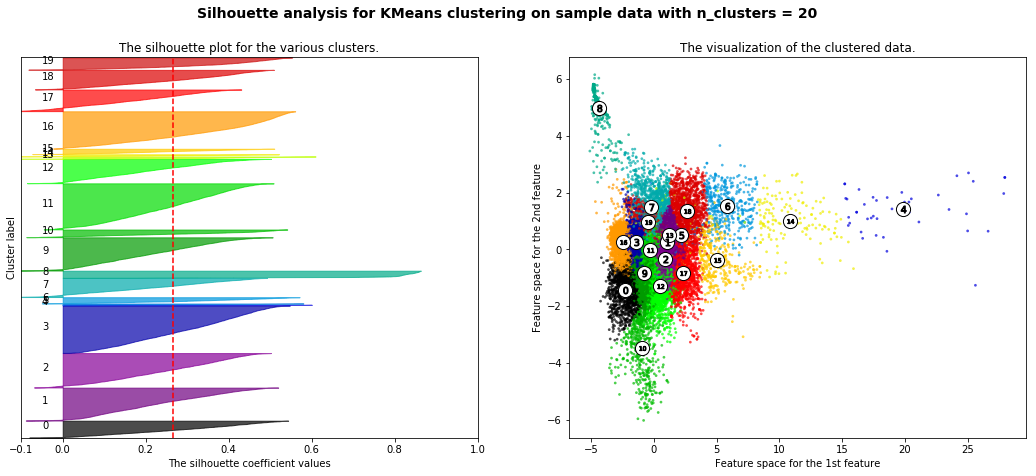

For n_clusters = 21 The average silhouette_score is : 0.27622568287368826


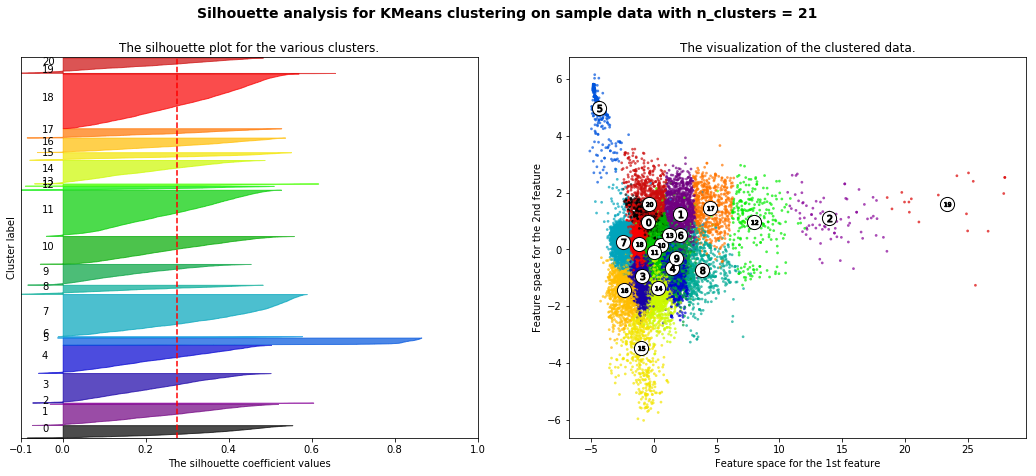

For n_clusters = 22 The average silhouette_score is : 0.27080104022035756


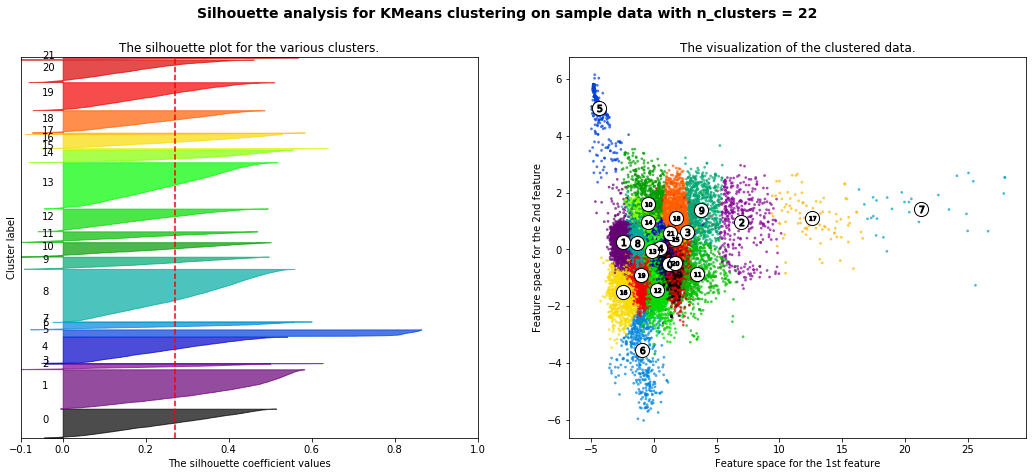

For n_clusters = 23 The average silhouette_score is : 0.26492787477465446


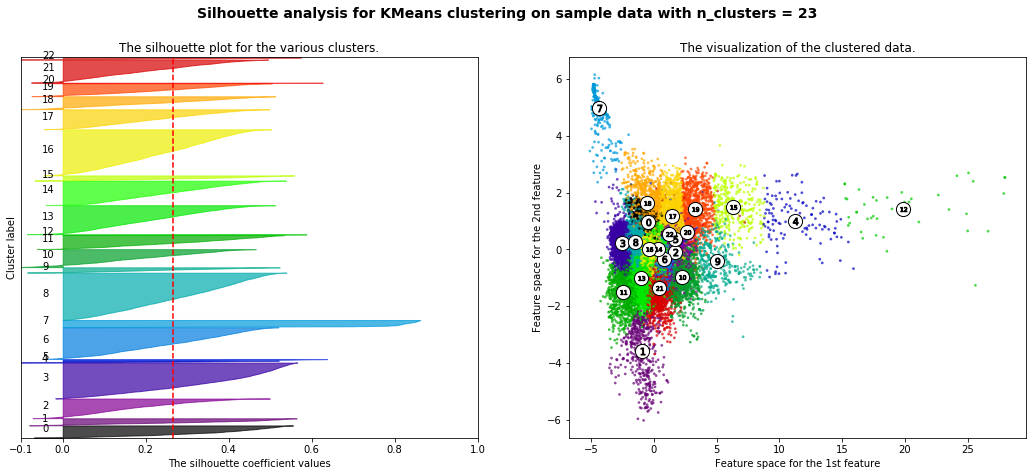

For n_clusters = 24 The average silhouette_score is : 0.2653444552865899


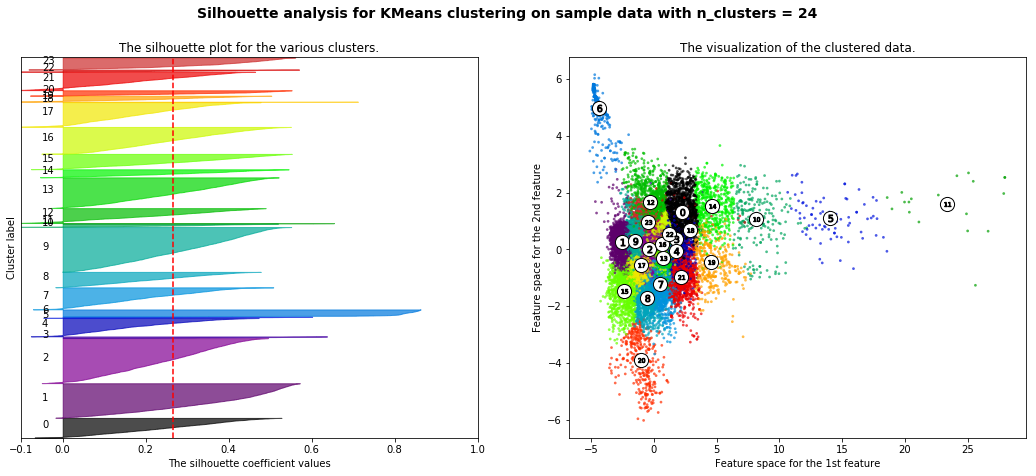

In [14]:
X = X_sklearn[np.random.choice(X_sklearn.shape[0], 25000, replace=False)]

#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,25))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()